Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# DOMAĆI ZADATAK - zadatak 2
## april 2021. 

# Pavle Šarenac 2020/0359

# __Zadatak__: Van der Pol oscilator
Van der Pol-ova jednačina predstavlja nelinearnu diferencijalnu jednačinu drugog reda sličnu jednačini prigušenih oscilacija i ima formu:

\begin{equation}
    \frac{d^2x}{dt^2} + \mu(x^2 - 1)\frac{dx}{dt} + x = 0
\end{equation}

gde je $\mu$ parametar koji modeluje prigušenje (ujedno i "jačinu nelinearnosti" jednačine) i za koji važi da je $\mu \geq 0$. Istorijski jednačina opisuje napon u jednom nelinearnom električnom kolu koje je služilo kao oscilator u prvim radio aparatima. Osim domena elektronike, jednačina ima svoje primene i u laserskoj tehnici (laser je tip van der Pol-ovog oscilatora), biologiji (opisivanje električnog potencijala neurona), seizmologiji (prostiji modeli zemljotresa) itd.  

a) Formirati Python definiciju <font color='blue'>vanderpol</font> koja predstavlja datu diferencijalnu jednačinu i za pozivni parametar ima parametar $\mu$. Rešiti jednačinu na vremenskom domenu od $0$ do $30$ u $1000$ ekvidistantnih tačaka, za početne uslove $x(0) = 0.5$ i $dx/dt = 0$ i za četiri vrednosti parametra $\mu$, $\mu = 0.1, 2, 5, 10$. Prikazati zavisnosti $x(t)$ u okviru jednog $2\times 2$ subplot-a. Obeležiti ose svake ćelije grafika i nasloviti svaku ćeliju grafika. U naslovu je potrebno da stoji odgovarajuća vrednost parametra $\mu$. Na drugom $2\times 2$ subplot-u nacrtati fazne dijagrame $dx/dt$ u funkciji od $x$. Obeležiti ose svake ćelije grafika i nasloviti svaku ćeliju grafika. U naslovu je potrebno da stoji odgovarajuća vrednost parametra $\mu$.  

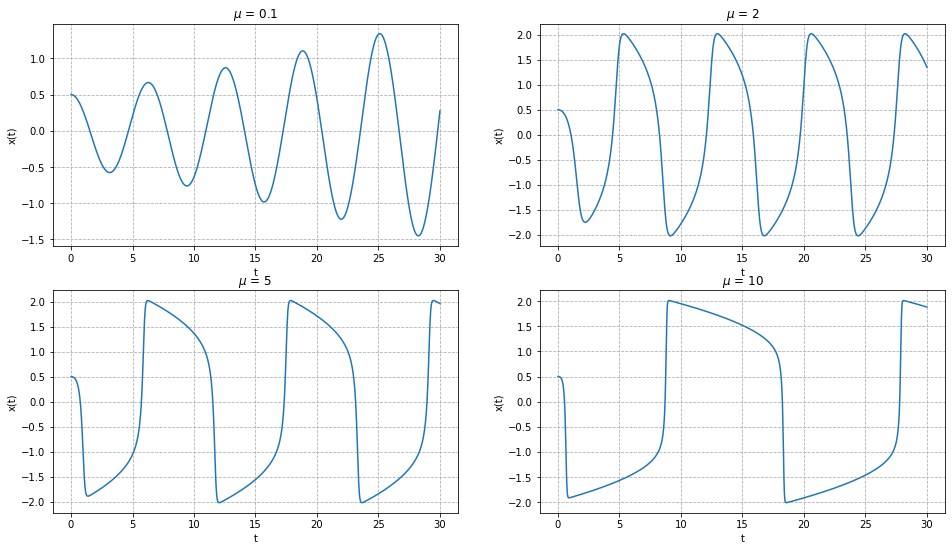

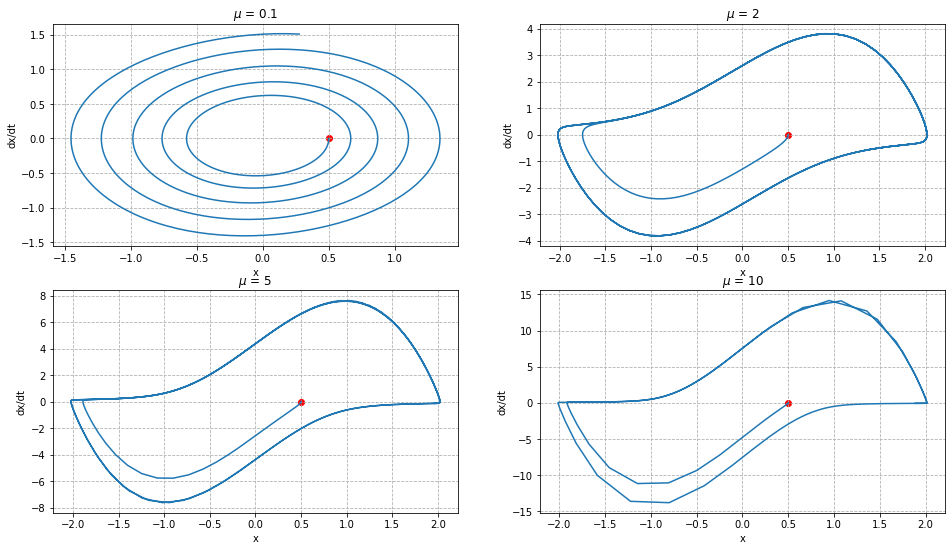

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


def vanderpol(initialCondition, t, mi):
    y1, y2 = initialCondition
    # y1 = x
    # y2 = dx/dt 
    # dy1/dt = dx/dt = y2 
    # dy2/dt = dx^2/dt^2 = -mi(x^2 - 1)dx/dt - x = -mi(y1^2 - 1)y2 - y1
    return [y2, -mi * (y1**2 - 1) * y2 - y1]

initialCondition = [0.5, 0]
t = np.linspace(0, 30, 1000)
mi = [0.1, 2, 5, 10]

plt.figure(figsize=(16, 9))

sol1 = integrate.odeint(vanderpol, initialCondition, t, args=(mi[0], ))
plt.subplot(2, 2, 1)
plt.plot(t, sol1[:, 0])
plt.title("$\mu$ = 0.1")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(linestyle="--")

sol2 = integrate.odeint(vanderpol, initialCondition, t, args=(mi[1], ))
plt.subplot(2, 2, 2)
plt.plot(t, sol2[:, 0])
plt.title("$\mu$ = 2")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(linestyle="--")

sol3 = integrate.odeint(vanderpol, initialCondition, t, args=(mi[2], ))
plt.subplot(2, 2, 3)
plt.title("$\mu$ = 5")
plt.plot(t, sol3[:, 0])
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(linestyle="--")

sol4 = integrate.odeint(vanderpol, initialCondition, t, args=(mi[3], ))
plt.subplot(2, 2, 4)
plt.title("$\mu$ = 10")
plt.plot(t, sol4[:, 0])
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(linestyle="--")

plt.show()

plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
plt.plot(sol1[:, 0], sol1[:, 1])
plt.title("$\mu$ = 0.1")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid(linestyle="--")
plt.scatter(initialCondition[0], initialCondition[1], color="red")

plt.subplot(2, 2, 2)
plt.plot(sol2[:, 0], sol2[:, 1])
plt.title("$\mu$ = 2")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid(linestyle="--")
plt.scatter(initialCondition[0], initialCondition[1], color="red")

plt.subplot(2, 2, 3)
plt.plot(sol3[:, 0], sol3[:, 1])
plt.title("$\mu$ = 5")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid(linestyle="--")
plt.scatter(initialCondition[0], initialCondition[1], color="red")

plt.subplot(2, 2, 4)
plt.plot(sol4[:, 0], sol4[:, 1])
plt.title("$\mu$ = 10")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid(linestyle="--")
plt.scatter(initialCondition[0], initialCondition[1], color="red")

plt.show()

Komentarisati kako parametar $\mu$ utiče na dobijenu dinamiku. Kakve su oscilacije u slučaju malog "prigušenja", a kakve u slučaju velikog? Komentarisati oblike faznih dijagrama u zavisnosti od parametra $\mu$. U skladu sa datim početnim uslovima, za svaki od slučaja prepoznati početnu tačku faznog dijagrama i obeležiti je na grafiku markerom crvene boje. Komentarisati u kom smeru se iscrtava fazni dijagram. 

- Malo prigušenje imamo za male vrednosti parametra $\mu$. Tada oscilacije podsećaju na slabo prigušene oscilacije kod kojih amplituda raste iz periode u periodu umesto da prati opadajuću eksponencijalnu anvelopu. <br><br>
- Veliko prigušenje imamo za velike vrednosti parametra $\mu$. Tada je razlika između amplituda oscilacija sve manja u svakoj periodi, pri čemu je frekvencija oscilacija obrnuto srazmerna sa vrednošću parametra $\mu$. <br><br>
- Fazni dijagram za $\mu$ = 0.1 podseća na onaj kod slabo prigušenih oscilacija, pri čemu se u ovom slučaju fazni dijagram iscrtava iznutra ka spolja, dok je kod slabo prigušenih oscilacija obrnuto. Posmatrajući preostale fazne dijagrame nameće se zaključak da oni predstavljaju nekakav zakon održanja energije jer su u pitanju zatvorene krive linije. Smer iscrtavanja svih faznih dijagrama je iznutra ka spolja.

b) Napisati Python definiciju <font color='blue'>maksimumi</font> koja pronalazi sve lokalne maksimume zavisnosti $x(t)$, odnosno vraća vrednosti maksimuma i vremenske trenutke u kojima se maksimumi dostižu. Primeniti funkciju na sva četiri rešenja iz prethodne tačke. Korišćenjem naredbe <font color='blue'>numpy.diff</font> kao i naredbe za srednju vrednost niza brojeva, za svaku vrednost parametra $\mu$ odrediti i ispisati period oscilacija kao srednju vrednost rastojanja između susedih maksimuma.  

In [24]:
def maksimumi(xArray, t):
    maxAndTArray = []
    for i in range(1, len(xArray) - 1):
        if xArray[i - 1] < xArray[i] > xArray[i + 1]:
            maxAndTArray.append((xArray[i], t[i]))
    return maxAndTArray

maxAndT1 = maksimumi(sol1[:, 0], t)
maxAndT2 = maksimumi(sol2[:, 0], t)
maxAndT3 = maksimumi(sol3[:, 0], t)
maxAndT4 = maksimumi(sol4[:, 0], t)
print("Za \u03BC = 0.1 vrednosti lokalnih maksimuma zavisnosti x(t) upareni sa njihovim vremenskim trenucima su:")
for i in range(len(maxAndT1)):
    print(maxAndT1[i])
print()
print("Za \u03BC = 2 vrednosti lokalnih maksimuma zavisnosti x(t) upareni sa njihovim vremenskim trenucima su:")
for i in range(len(maxAndT2)):
    print(maxAndT2[i])
print()
print("Za \u03BC = 5 vrednosti lokalnih maksimuma zavisnosti x(t) upareni sa njihovim vremenskim trenucima su:")
for i in range(len(maxAndT3)):
    print(maxAndT3[i])
print()
print("Za \u03BC = 10 vrednosti lokalnih maksimuma zavisnosti x(t) upareni sa njihovim vremenskim trenucima su:")
for i in range(len(maxAndT4)):
    print(maxAndT4[i])
print()

max1 = []
for i in range(len(maxAndT1)):
    max1.append(maxAndT1[i][1])
max2 = []
for i in range(len(maxAndT2)):
    max2.append(maxAndT2[i][1])
max3 = []
for i in range(len(maxAndT3)):
    max3.append(maxAndT3[i][1])
max4 = []
for i in range(len(maxAndT4)):
    max4.append(maxAndT4[i][1])

print("Za \u03BC = 0.1 period oscilacija je: {}".format(np.average(np.diff(max1))))
print("Za \u03BC = 2 period oscilacija je: {}".format(np.average(np.diff(max2))))
print("Za \u03BC = 5 period oscilacija je: {}".format(np.average(np.diff(max3))))
print("Za \u03BC = 10 period oscilacija je: {}".format(np.average(np.diff(max4))))

Za μ = 0.1 vrednosti lokalnih maksimuma zavisnosti x(t) upareni sa njihovim vremenskim trenucima su:
(0.6665491975453253, 6.276276276276276)
(0.871020872226231, 12.552552552552552)
(1.1040079358720765, 18.82882882882883)
(1.3425555653264334, 25.105105105105103)

Za μ = 2 vrednosti lokalnih maksimuma zavisnosti x(t) upareni sa njihovim vremenskim trenucima su:
(2.019254977866591, 5.315315315315315)
(2.019669717775336, 12.942942942942944)
(2.019720331840209, 20.6006006006006)
(2.019773048097402, 28.22822822822823)

Za μ = 5 vrednosti lokalnih maksimuma zavisnosti x(t) upareni sa njihovim vremenskim trenucima su:
(2.021503299462046, 6.246246246246246)
(2.0213803868096383, 17.86786786786787)
(2.021421027312102, 29.45945945945946)

Za μ = 10 vrednosti lokalnih maksimuma zavisnosti x(t) upareni sa njihovim vremenskim trenucima su:
(2.014074262445475, 9.00900900900901)
(2.0142358882887863, 28.10810810810811)

Za μ = 0.1 period oscilacija je: 6.276276276276275
Za μ = 2 period oscilacija je: 7.

c) Varirati parametar $\mu$ od $0.1$ do $15$ u $20$ tačaka i u svakoj tački izračunati period oscilacija. Nacrtati grafik zavisnosti perioda oscilacija $T$ od parametra $\mu$. Obeležiti ose grafika. Koristeći <font color='blue'>scipy.optimize.curve_fit</font> odrediti koeficijente koji definišu optimalnu pravu.  

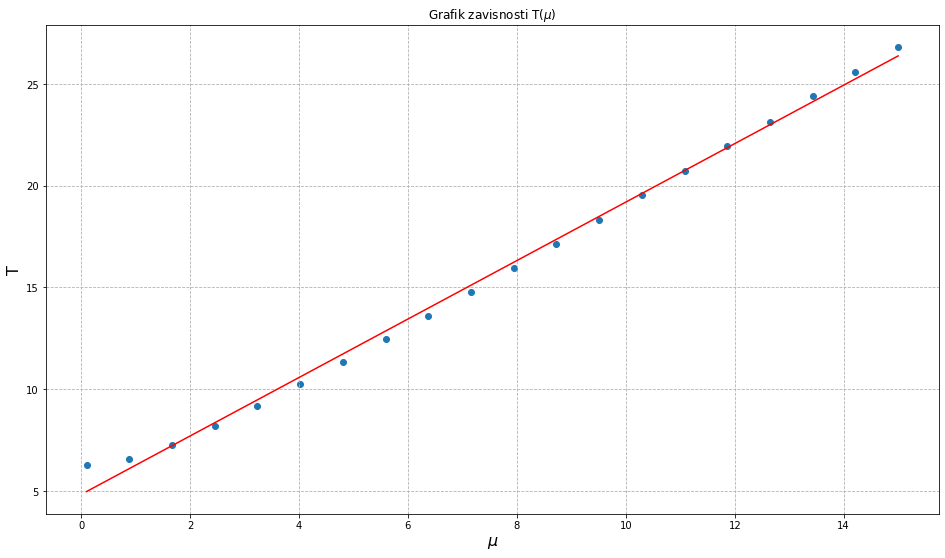

In [25]:
from scipy.optimize import curve_fit

def function(x, a, b):
    return a * x + b

mi = np.linspace(0.1, 15, 20)
t = np.linspace(0, 40, 1000)
# povecao sam vremenski opseg da ide od 0 do 40 da bih mogao da primenim np.diff na ceo niz
periodArray = []
for i in range(len(mi)):
    sol = integrate.odeint(vanderpol, initialCondition, t, args=(mi[i], ))
    maxAndT = maksimumi(sol[:, 0], t)
    maxT = []
    for j in range(len(maxAndT)):
        maxT.append(maxAndT[j][1])
    periodArray.append(np.average(np.diff(maxT)))
    
# popt, pcov = curve_fit(function, xData, yData) <-- opsti oblik
popt, pcov = curve_fit(function, mi, periodArray)
# u popt ce biti optimalni koeficijenti [a, b], dok su u pcov smesteni podaci o preciznosti optimalnih koeficijenata
a, b = popt
plt.figure(figsize=(16, 9))
plt.title("Grafik zavisnosti T($\mu$)")
# optimalna prava
plt.plot(mi, mi * a + b, color="red")
# tacne vrednosti uredjenih parova mi, T
plt.scatter(mi, periodArray)
plt.xlabel("$\mu$", size=16)
plt.ylabel("T", size=16)
plt.grid(linestyle="--")
plt.show()

d) Umesto ugrađenih metoda, jednačinu rešiti primenom metode konačnih razlika. Ponoviti grafike iz tačke a) primenom ove metode. Na jednom $2\times 2$ subplot grafiku nacrtati rešenja $x(t)$ iz tačke a) kao i rešenja za $x(t)$ dobijena primenom FDM metode. Obeležiti ose svake ćelije grafika, uneti naslov svake ćelije, kao i legendu. Na drugom $2\times 2$ subplot grafiku nacrtati fazne dijagrame $dx/dt$ u funkciji $x$ iz tačke a) kao i fazne dijagrame dobijene primenom FDM metode. Obeležiti ose svake ćelije grafika, uneti naslov svake ćelije, kao i legendu. 

Pažljivo odabrati vremenski korak rešavanja i diskutovati izbor. Da li izbor vremenskog koraka zavisi od parametra $\mu$ i ako zavisi komentarisati zašto. 

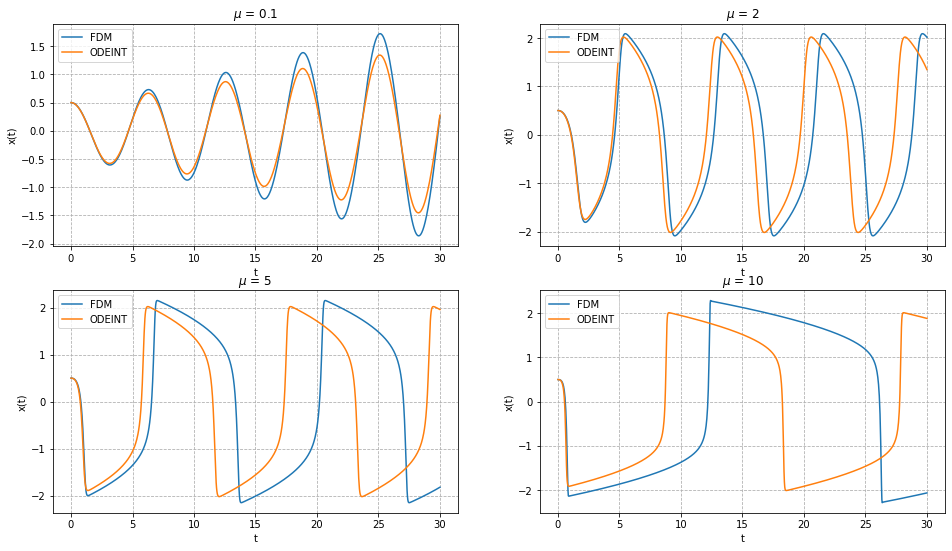

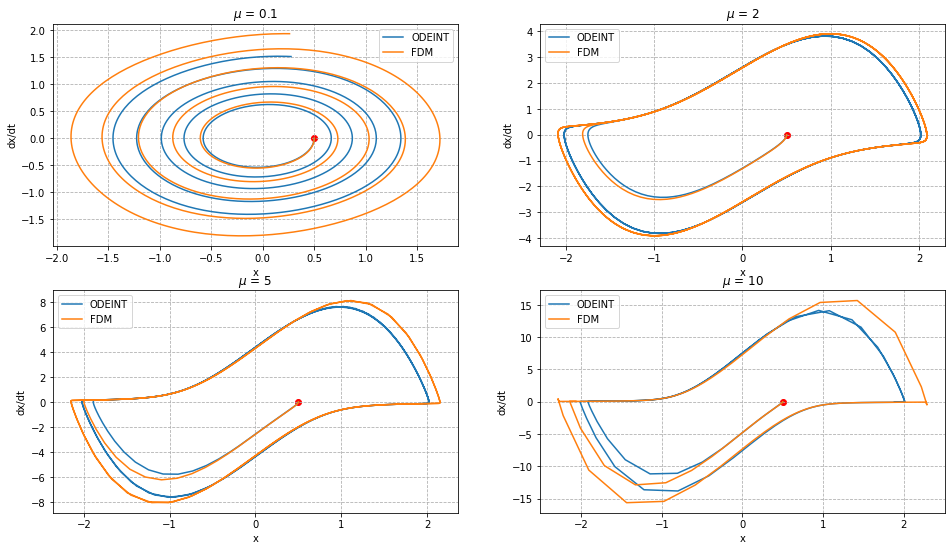

In [26]:
initialCondition = [0.5, 0]
t = np.linspace(0, 30, 1000)
mi = [0.1, 2, 5, 10]

# pravim matrice sa len(t) = 1000 vrsta (jer je na toliko tacaka izdeljeno vreme) i 2 kolone (jer je tog reda dif. j-na)
sol1Fdm = np.zeros([len(t), 2])
sol2Fdm = np.zeros([len(t), 2])
sol3Fdm = np.zeros([len(t), 2])
sol4Fdm = np.zeros([len(t), 2]) 
# prvu vrstu matrica popunjavam pocetnim uslovima: x(t=0) = 0.5, dx/dt(t=0) = 0
sol1Fdm[0] = np.array(initialCondition) 
sol2Fdm[0] = np.array(initialCondition) 
sol3Fdm[0] = np.array(initialCondition) 
sol4Fdm[0] = np.array(initialCondition) 

# metod konacnih razlika
# radim rucno priblizno ono sto metoda integrate.odeint radi automatski
# resavam paralelno integral od dy1/dt i dy2/dt, i tako nalazim y1 = x(t) i y2 = dx/dt za sve vremenske trenutke t
# ovo radim tako sto nalazim zbir prosle vrednosti i naredne vrednosti diferencijala
# npr x(t = t[1]) = x(t = t[0]) + dx/dt * (t[1] - t[0]); <-- isto se primenjuje za dx/dt
for i in range(1, len(t)):
    sol1Fdm[i] = sol1Fdm[i - 1] + np.array(vanderpol(sol1Fdm[i - 1], t[i], mi[0])) * (t[i] - t[i - 1])
    sol2Fdm[i] = sol2Fdm[i - 1] + np.array(vanderpol(sol2Fdm[i - 1], t[i], mi[1])) * (t[i] - t[i - 1])
    sol3Fdm[i] = sol3Fdm[i - 1] + np.array(vanderpol(sol3Fdm[i - 1], t[i], mi[2])) * (t[i] - t[i - 1])
    sol4Fdm[i] = sol4Fdm[i - 1] + np.array(vanderpol(sol4Fdm[i - 1], t[i], mi[3])) * (t[i] - t[i - 1])
    
plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
plt.plot(t, sol1Fdm[:, 0], label="FDM")
plt.plot(t, sol1[:, 0], label="ODEINT")
plt.title("$\mu$ = 0.1")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(linestyle="--")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, sol2Fdm[:, 0], label="FDM")
plt.plot(t, sol2[:, 0], label="ODEINT")
plt.title("$\mu$ = 2")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(linestyle="--")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t, sol3Fdm[:, 0], label="FDM")
plt.plot(t, sol3[:, 0], label="ODEINT")
plt.title("$\mu$ = 5")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(linestyle="--")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t, sol4Fdm[:, 0], label="FDM")
plt.plot(t, sol4[:, 0], label="ODEINT")
plt.title("$\mu$ = 10")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(linestyle="--")
plt.legend()

plt.show()

plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
plt.plot(sol1[:, 0], sol1[:, 1], label="ODEINT")
plt.plot(sol1Fdm[:, 0], sol1Fdm[:, 1], label="FDM")
plt.title("$\mu$ = 0.1")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid(linestyle="--")
plt.legend()
plt.scatter(initialCondition[0], initialCondition[1], color="red")

plt.subplot(2, 2, 2)
plt.plot(sol2[:, 0], sol2[:, 1], label="ODEINT")
plt.plot(sol2Fdm[:, 0], sol2Fdm[:, 1], label="FDM")
plt.title("$\mu$ = 2")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid(linestyle="--")
plt.legend()
plt.scatter(initialCondition[0], initialCondition[1], color="red")

plt.subplot(2, 2, 3)
plt.plot(sol3[:, 0], sol3[:, 1], label="ODEINT")
plt.plot(sol3Fdm[:, 0], sol3Fdm[:, 1], label="FDM")
plt.title("$\mu$ = 5")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid(linestyle="--")
plt.legend()
plt.scatter(initialCondition[0], initialCondition[1], color="red")

plt.subplot(2, 2, 4)
plt.plot(sol4[:, 0], sol4[:, 1], label="ODEINT")
plt.plot(sol4Fdm[:, 0], sol4Fdm[:, 1], label="FDM")
plt.title("$\mu$ = 10")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.grid(linestyle="--")
plt.legend()
plt.scatter(initialCondition[0], initialCondition[1], color="red")

plt.show()

Sa većim parametrom $\mu$ veća je i greška. Zato to moramo kompenzovati izborom manjeg vremenskog koraka rešavanja (to znači da želimo veći broj ekvidistantnih tačaka na datom intervalu koji posmatramo --> tada će se konačne razlike računati više puta) da ne bismo dodatno povećali grešku. Konkretno, ja sam odlučio da imam 1000 ekvidistantnih tačaka za vremenski interval od 0 do 30, i zato je ovako vidljiva razlika između rezultata dobijenih pomoću ODEINT metode i metode konačnih razlika (FDM). Ako bismo eksperimentisali i uzeli npr. 10 000 ekvidistantnih tačaka, videli bismo da metoda konačnih razlika daje dosta preciznije rezultate nego pre. To je zato što smo dodatno smanjili vremenski korak rešavanja.